<a href="https://colab.research.google.com/github/ErnestSun916/bigdata/blob/main/%E3%80%8C0518_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(SportsAnalytics)

In [ ]:
library(ggplot2)

In [ ]:
NBA1718<-fetch_NBAPlayerStatistics("17-18")

`geom_smooth()` using formula 'y ~ x'



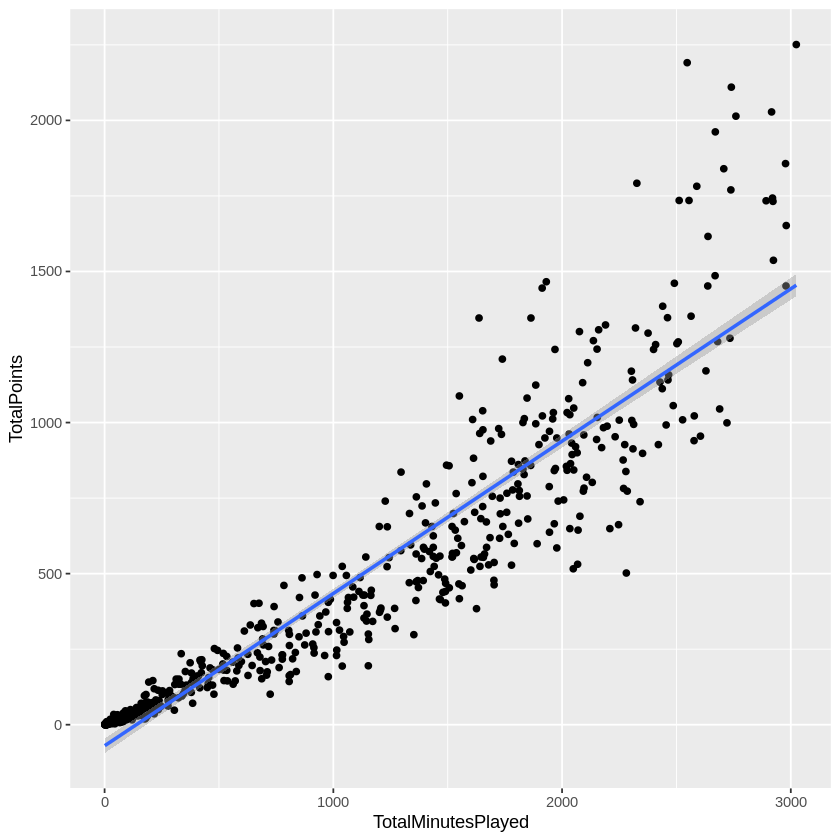

In [ ]:
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")

In [ ]:
lm(TotalPoints~TotalMinutesPlayed,data=NBA1718)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data=NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -12.081943            -0.009009             1.291930  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    117600000 
Residual Deviance: 2176000 	AIC: 6023

In [ ]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data=NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -12.081943            -0.009009             1.291930  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    117600000 
Residual Deviance: 2176000 	AIC: 6023

In [ ]:
mydata<-read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [ ]:
mydata$rank<- factor(mydata$rank)

In [ ]:
mylogit<-glm(admit~gre+gpa+rank,
data=mydata,family="binomial")

In [ ]:
sum<-summary(mylogit)

In [ ]:
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [ ]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart)

In [ ]:
par(mfrow=c(1,1),mar=rep(1,4))

In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [ ]:
library(datasets)

In [ ]:
data(Groceries)

In [ ]:
Groceries@data@Dim

[1]  169 9835

In [ ]:
rules<-apriori(Groceries,
parameter=list(supp=0.001,conf=0.8),
control=list(verbose=F))

In [ ]:
options(digits=2)

In [ ]:
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [ ]:
rules<-sort(rules,by="confidence",decreasing=TRUE)

In [ ]:
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
appearance=list(default="lhs",rhs="whole milk"),
control=list(verbose=F))

In [ ]:
rulesR<-sort(rulesR,decreasing=TRUE,by="confidence")

In [ ]:
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [ ]:
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="bottled beer"),
control=list(verbose=F))

In [ ]:
rulesL<-sort(rulesL,decreasing=TRUE,by="confidence")

In [ ]:
inspect(rulesL[1:5])

    lhs               rhs                support confidence coverage lift count
[1] {bottled beer} => {whole milk}       0.020   0.25       0.081    0.99 201  
[2] {bottled beer} => {soda}             0.017   0.21       0.081    1.21 167  
[3] {bottled beer} => {other vegetables} 0.016   0.20       0.081    1.04 159  
[4] {bottled beer} => {bottled water}    0.016   0.20       0.081    1.77 155  
[5] {bottled beer} => {rolls/buns}       0.014   0.17       0.081    0.92 134  
